<a href="https://colab.research.google.com/github/Thofa90/Car-Dataset-Analysis-Data-Wrangling-EDA-/blob/main/Car_Dataset_Analysis_Data_Wrangling_%26_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: Car dataset analysis (data wrangling and EDA)**

**📌 Project Title**

Car Dataset Analysis: Price, Performance & Market Insights

⸻

**🎯 Goal**

The goal of this project is to clean, transform, and analyze a real-world car dataset to uncover relationships between vehicle attributes (engine power, size, MPG, drivetrain, etc.) and their pricing, popularity, and efficiency.

⸻

**💼 Business Context**

The automotive industry is highly competitive and data-driven. Manufacturers, dealerships, and marketers rely on analytics to:

	•	Understand how engine performance and design choices influence car pricing.
	•	Identify customer preferences based on vehicle size, transmission, and market category.
	•	Track fuel efficiency trends for regulatory and consumer demands.
	•	Benchmark popularity and market value of different vehicle types.

**By exploring this dataset, businesses can design better pricing strategies, optimize inventory management, and improve marketing segmentation.**

⸻

**🌍 Real-World Impact**

	•	For manufacturers: Helps align production with consumer demand (e.g., SUVs vs. sedans, hybrids vs. gas).
	•	For dealers: Supports pricing strategies and promotional campaigns by understanding what features drive higher MSRP.
	•	For policymakers: Provides insights into fuel efficiency trends that align with environmental goals.
	•	For consumers: Improves transparency around what factors contribute to car prices and fuel economy.

⸻

**🛠️ Skills Learned**

Working on this project strengthened the following data science and analytical skills:

	•	Data Cleaning & Transformation: Handling missing values, type conversion, string normalization, filtering.
	•	Feature Engineering: Creating new features like Total MPG and Price per HP to extract business insights.
	•	Exploratory Data Analysis (EDA): Using descriptive stats, grouping, and correlation analysis.
	•	Data Visualization: Building histograms, scatter plots, boxplots, line charts, and heatmaps with Matplotlib and Seaborn.
	•	Business Insight Extraction: Translating statistical findings into actionable recommendations for the automotive industry.


##**Importing packages**
Python packages to cover data manipulation, visualization, and statistical analysis.

In [1]:
# For numerical operations
import numpy as np
# For data manipulation and analysis
import pandas as pd
# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Data Loading**

Use Pandas to read CSV, Excel, or other file formats.

In [2]:
#Load a CSV file
data = pd.read_csv('/content/drive/My Drive/Datasets/Car_dataset.csv')
df = data # All missing value will be dealt in df
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
data.shape

(11914, 16)

##**Understanding the Dataset**

**List of Columns in Dataframe**

In [ ]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [ ]:
def print_unique_values(data):
    for column in data.columns:
        print(f"Unique values in {column}:")
        print(df[column].unique())
        print("\n")

# Call the function
#print_unique_values(data)

**Basic information**

In [ ]:
# Summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

**Summary statistics**

In [ ]:
# Statistical summary for numerical columns
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


**Missing values**

In [ ]:
# Check for missing values
data.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3742


#**Project Tasks**

##**Task_1: Cleaning the Dataset**

###**1.1 Handle Missing Data**

In [ ]:
#checking null values in Engine Fuel Type
miss_engine_fuel=data[data['Engine Fuel Type'].isnull()]
#print('Engine Fuel Type: Before data cleaning \n\n',miss_engine_fuel.to_string(index=False),'\n\n\n')

 # Checking null values in Engine HP column
miss_engine_hp=data[data['Engine HP'].isnull()]

miss_data=miss_engine_hp[['Make','Model']].value_counts()
#print('Engine HP: Before data cleaning \n\n',miss_data,'\n\n\n')

# Adjusting missing value in 'Engine Fuel Type' column

fun_input = lambda row: 'regular unleaded' if (row['Make'] == 'Suzuki' and row['Model'] == 'Verona' and pd.isnull(row['Engine Fuel Type'])) else row['Engine Fuel Type']
df['Engine Fuel Type'] = df.apply(fun_input, axis=1)

# Adjusting missing value in 'Engine HP' column
# for electric car , all Engine HP data is not available and right value taken from internet, and the rest of HP data is taken from the data
# interpretation of the dataset for respective specific make and model

fun_input = lambda row: 670 if (row['Make'] == 'Tesla' and row['Model'] == 'Model S' and pd.isnull(row['Engine HP'])) else row['Engine HP']
df['Engine HP'] = df.apply(fun_input, axis=1)

fun_input = lambda row: 147 if (row['Make'] == 'Nissan' and row['Model'] == 'Leaf' and pd.isnull(row['Engine HP'])) else row['Engine HP']
df['Engine HP'] = df.apply(fun_input, axis=1)

fun_input = lambda row: 305 if (row['Make'] == 'Chevrolet' and row['Model'] == 'Impala' and row['Engine Cylinders'] == 6 and pd.isnull(row['Engine HP'])) else row['Engine HP']
df['Engine HP'] = df.apply(fun_input, axis=1)

fun_input = lambda row: 193 if (
    row['Make'] == 'Ford' and
    row['Model'] == 'Freestar' and
    row['highway MPG']==22 and
    pd.isnull(row['Engine HP'])
) else (
    201 if (
        row['Make'] == 'Ford' and
        row['Model'] == 'Freestar' and
        row['highway MPG']==21 and
        pd.isnull(row['Engine HP'])
    )
    else row['Engine HP']
)
df['Engine HP'] = df.apply(fun_input, axis=1)

# Use a lambda function with apply() to fill missing values in 'Engine HP' column for Kia, Soul EV where Engine cylinders are 0
fun_input = lambda row: 201 if (row['Make'] == 'Kia' and row['Model'] == 'Soul EV' and row['Engine Cylinders'] == 0 and pd.isnull(row['Engine HP'])) else row['Engine HP']
df['Engine HP'] = df.apply(fun_input, axis=1)

# Use a lambda function with apply() to fill missing values in 'Engine HP' column for Ford, Escape  where Engine Fuel type is regular unleaded
fun_input = lambda row: 168 if (row['Make'] == 'Ford' and row['Model'] == 'Escape' and row['Engine Fuel Type'] == 'regular unleaded' and pd.isnull(row['Engine HP'])) else row['Engine HP']
df['Engine HP'] = df.apply(fun_input, axis=1)

# Use a lambda function with apply() to fill missing values in 'Engine HP' column for Lincoln, Continental  where Engine cylinders is 6
fun_input = lambda row: 305 if (row['Make'] == 'Lincoln' and row['Model'] == 'Continental' and row['Engine Cylinders'] == 6 and pd.isnull(row['Engine HP'])) else row['Engine HP']
df['Engine HP'] = df.apply(fun_input, axis=1)

# Use a lambda function with apply() to fill missing values in 'Engine HP' column for Lincoln, MKZ  where Market category is Luxury and Hybrid
fun_input = lambda row: 188 if (row['Make'] == 'Lincoln' and row['Model'] == 'MKZ' and row['Market Category'] == 'Luxury,Hybrid' and pd.isnull(row['Engine HP'])) else row['Engine HP']
df['Engine HP'] = df.apply(fun_input, axis=1)

# Use a lambda function with apply() to fill missing values in 'Engine HP' column for FIAT, 500e, electric car (from online as no other values mentioned for electric)
fun_input = lambda row: 117 if (row['Make'] == 'FIAT' and row['Model'] == '500e' and row['Engine Fuel Type'] == 'electric' and pd.isnull(row['Engine HP'])) else row['Engine HP']
df['Engine HP'] = df.apply(fun_input, axis=1)

# Use a lambda function with apply() to fill missing values in 'Engine HP' column for Ford, Focus, electric car (from online as no other values mentioned for electric)
fun_input = lambda row: 143 if (row['Make'] == 'Ford' and row['Model'] == 'Focus' and row['Engine Fuel Type'] == 'electric' and pd.isnull(row['Engine HP'])) else row['Engine HP']
df['Engine HP'] = df.apply(fun_input, axis=1)

# Use a lambda function with apply() to fill missing values in 'Engine HP' column for Honda, Fit EV, electric car (from online as no other values mentioned for electric)
fun_input = lambda row: 123 if (row['Make'] == 'Honda' and row['Model'] == 'Fit EV' and row['Engine Fuel Type'] == 'electric' and pd.isnull(row['Engine HP'])) else row['Engine HP']
df['Engine HP'] = df.apply(fun_input, axis=1)

# Calculate the mode of 'Engine HP' for Toyota RAV4 EV with electric fuel type to fill missing value
mode_hp = df[(df['Make'] == 'Toyota') & (df['Model'] == 'RAV4 EV') & (df['Engine Fuel Type'] == 'electric')]['Engine HP'].mode()
fun_input = lambda row: mode_hp[0] if (row['Make'] == 'Toyota' and row['Model'] == 'RAV4 EV' and row['Engine Fuel Type'] == 'electric' and pd.isnull(row['Engine HP'])) else row['Engine HP']
df['Engine HP'] = df.apply(fun_input, axis=1)

# Calculate the mode of 'Engine HP' for Mitsubishi	i-MiEV with electric fuel type to fill the missing value
mode_hp = df[(df['Make'] == 'Mitsubishi') & (df['Model'] == 'i-MiEV') & (df['Engine Fuel Type'] == 'electric')]['Engine HP'].mode()
fun_input = lambda row: mode_hp[0] if (row['Make'] == 'Mitsubishi' and row['Model'] == 'i-MiEV' and row['Engine Fuel Type'] == 'electric' and pd.isnull(row['Engine HP'])) else row['Engine HP']
df['Engine HP'] = df.apply(fun_input, axis=1)

# Use a lambda function with apply() to fill missing values in 'Engine HP' column for Mercedes-Benz, M-Class, disel fuel with 4 cylinders (from online as no other values mentioned for disel with 4 cylinders)
fun_input = lambda row: 200 if (row['Make'] == 'Mercedes-Benz' and row['Model'] == 'M-Class' and row['Engine Fuel Type'] == 'diesel' and row['Engine Cylinders']==4 and pd.isnull(row['Engine HP'])) else row['Engine HP']
df['Engine HP'] = df.apply(fun_input, axis=1)

# Adjusting missing value in 'Engine Cylinders' column

# for electric vehicles, Tesla : cylinder=0 and for Mazda RX-7/RX-8, cylinder=0 cause they use rotary engine
fun_input = lambda row: 0 if (
    (row['Engine Fuel Type'] == 'electric') or
    (row['Make'] == 'Mazda' and row['Model']=='RX-7') or
     (row['Make'] == 'Mazda' and row['Model']=='RX-8')
 and pd.isnull(row['Engine Cylinders'])) else row['Engine Cylinders']
df['Engine Cylinders'] = df.apply(fun_input, axis=1)

# Adjusting missing value in 'Number of Doors' column

# Calculate the mean of 'Number of Doors' for Tesla Model S and Ferrari FF
tesla_model_s_mean_doors = df[(df['Make'] == 'Tesla') & (df['Model'] == 'Model S')]['Number of Doors'].mean()
ferrari_ff_mean_doors = df[(df['Make'] == 'Ferrari') & (df['Model'] == 'FF')]['Number of Doors'].mean()

fun_input = lambda row: tesla_model_s_mean_doors if (
    row['Make'] == 'Tesla' and
    row['Model'] == 'Model S' and
    pd.isnull(row['Number of Doors'])
) else (
    ferrari_ff_mean_doors if (
        row['Make'] == 'Ferrari' and
        row['Model'] == 'FF' and
        pd.isnull(row['Number of Doors'])
    ) else row['Number of Doors']
)
df['Number of Doors'] = df.apply(fun_input, axis=1)

# Adjusting missing values in Market Category column in 2 steps

# Checking missing values in 'Market Category' Column with pair of Make and Model
miss_cat=data[data['Market Category'].isnull()]
missing_market_category = miss_cat[['Make','Model']].value_counts()
#print('Missing values in Market category column with pair of make and Model\n')
#print(missing_market_category)

# Step 1:
# saving Make and Model in the dictionary where the key should be "Make" and values are "Model" for NaN 'Market Category'

missing_market_category_dict = {}
for index, value in missing_market_category.items():
    make, model = index
    if make not in missing_market_category_dict:
        missing_market_category_dict[make] = []
    missing_market_category_dict[make].append(model)
import pprint
#print('\nThe dictionary: The make and Model where Market Category column has NaN value\n\n')
#pprint.pprint(missing_market_category_dict)

# Step 2:
# when the key and value from this dictionary 'missing_market_category_dict' is matched to the main dataset 'data', for 'NaN' value of 'Market Category'
#column, then fill those 'NaN' values with the  mode of the 'Market Category' column but when the 'Market category ' column contains
#all value 'NaN' with specific Make and Model ,then put string 'unknown'


for make, models in missing_market_category_dict.items():
      # If models is not a list, make it a list
    models = models if isinstance(models, list) else [models]
    for model in models:
        # Check if all values for this make and model are NaN
        if df[(df['Make'] == make) & (df['Model'] == model)]['Market Category'].isnull().all():
            df.loc[(df['Make'] == make) & (df['Model'] == model), 'Market Category'] = 'unknown'
        else:
            # Calculate the mode of 'Market Category' for this make and model, excluding NaN values
            mode_market_category = df[(df['Make'] == make) & (df['Model'] == model)]['Market Category'].mode()

            # Fill NaN values with the mode. If the mode is empty, fill with 'unknown'
            if len(mode_market_category) > 0:
              df.loc[(df['Make'] == make) & (df['Model'] == model) & (df['Market Category'].isnull()), 'Market Category'] = mode_market_category[0]
            else:
              df.loc[(df['Make'] == make) & (df['Model'] == model) & (df['Market Category'].isnull()), 'Market Category'] = 'unknown'



print('\n\nThe main dataset after dealing with missing values: \n\n',df.isnull().sum())



The main dataset after dealing with missing values: 

 Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64


###**1.2 Data Type Conversion**

In [ ]:
# Ensure that columns are of the correct data type for analysis

df['Year'] = df['Year'].astype(int)
df['Engine HP'] = df['Engine HP'].astype(int)
df['Engine Cylinders'] = df['Engine Cylinders'].astype(int)
df['Number of Doors'] = df['Number of Doors'].astype(int)
df['highway MPG'] = df['highway MPG'].astype(float)
df['city mpg'] = df['city mpg'].astype(float)
df['Popularity'] = df['Popularity'].astype(int)
df['MSRP'] = df['MSRP'].astype(float)


# Check data types after conversion
df.dtypes

,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,int64
Engine Cylinders,int64
Transmission Type,object
Driven_Wheels,object
Number of Doors,int64
Market Category,object


###**1.3 Filtering Data**

In [ ]:
# Filter the dataset df to only include cars from the year 1995 and later and drop the duplicates

# Filter the dataset for cars from 1995 and later
df_filtered = df[df['Year'] >= 1995]

# Drop duplicate rows
df_filtered = df_filtered.drop_duplicates()

df_filtered

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26.0,19.0,3916,46135.0
1,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,28.0,19.0,3916,40650.0
2,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,28.0,20.0,3916,36350.0
3,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,28.0,18.0,3916,29450.0
4,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,28.0,18.0,3916,34500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300,6,AUTOMATIC,all wheel drive,4,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23.0,16.0,204,46120.0
11910,Acura,ZDX,2012,premium unleaded (required),300,6,AUTOMATIC,all wheel drive,4,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23.0,16.0,204,56670.0
11911,Acura,ZDX,2012,premium unleaded (required),300,6,AUTOMATIC,all wheel drive,4,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23.0,16.0,204,50620.0
11912,Acura,ZDX,2013,premium unleaded (recommended),300,6,AUTOMATIC,all wheel drive,4,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23.0,16.0,204,50920.0


###**1.4 String Operations**

In [ ]:
# Convert 'Vehicle Style' and 'Market Category' columns to lowercase and rename properly column name
df_filtered['Vehicle Style'] = df_filtered['Vehicle Style'].str.lower()
df_filtered['Vehicle Size'] = df_filtered['Vehicle Size'].str.lower()
df_filtered['Transmission Type'] = df_filtered['Transmission Type'].str.lower()
df_filtered['Market Category'] = df_filtered['Market Category'].str.lower()
df_filtered=df_filtered.rename(columns={'Driven_Wheels':'Driven Wheels','highway MPG':'Highway MPG','city mpg':'City MPG'})

# Display the first few rows to verify the changes
df_filtered.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,Highway MPG,City MPG,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335,6,manual,rear wheel drive,2,"factory tuner,luxury,high-performance",compact,coupe,26.0,19.0,3916,46135.0
1,BMW,1 Series,2011,premium unleaded (required),300,6,manual,rear wheel drive,2,"luxury,performance",compact,convertible,28.0,19.0,3916,40650.0
2,BMW,1 Series,2011,premium unleaded (required),300,6,manual,rear wheel drive,2,"luxury,high-performance",compact,coupe,28.0,20.0,3916,36350.0
3,BMW,1 Series,2011,premium unleaded (required),230,6,manual,rear wheel drive,2,"luxury,performance",compact,coupe,28.0,18.0,3916,29450.0
4,BMW,1 Series,2011,premium unleaded (required),230,6,manual,rear wheel drive,2,luxury,compact,convertible,28.0,18.0,3916,34500.0


##**Task_2: Feature Engineering**

###**Saving the cleaned Dataset in CSV**

In [ ]:
from google.colab import files

# Save the cleaned dataset locally
df_cleaned = df_filtered.copy()
student_name = 'Thofa_Tazkia' #introduce your name here joining the surname with a _
df_cleaned.to_csv(f'cleaned_data_{student_name}.csv', index=False)

#Allow download for manual upload
files.download(f'cleaned_data_{student_name}.csv')
df_cleaned.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,Highway MPG,City MPG,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335,6,manual,rear wheel drive,2,"factory tuner,luxury,high-performance",compact,coupe,26.0,19.0,3916,46135.0
1,BMW,1 Series,2011,premium unleaded (required),300,6,manual,rear wheel drive,2,"luxury,performance",compact,convertible,28.0,19.0,3916,40650.0
2,BMW,1 Series,2011,premium unleaded (required),300,6,manual,rear wheel drive,2,"luxury,high-performance",compact,coupe,28.0,20.0,3916,36350.0
3,BMW,1 Series,2011,premium unleaded (required),230,6,manual,rear wheel drive,2,"luxury,performance",compact,coupe,28.0,18.0,3916,29450.0
4,BMW,1 Series,2011,premium unleaded (required),230,6,manual,rear wheel drive,2,luxury,compact,convertible,28.0,18.0,3916,34500.0


###**2.1 Create New Columns**

In [ ]:
# Calculate Total MPG
df_cleaned['Total MPG'] = round(((df_cleaned['City MPG'] + df_cleaned['Highway MPG']) / 2),2)

# Calculate Price per HP
df_cleaned['Price per HP'] = round((df_cleaned['MSRP'] / df_cleaned['Engine HP']),2)
df_cleaned.head()




,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,Highway MPG,City MPG,Popularity,MSRP,Total MPG,Price per HP
0,BMW,1 Series M,2011,premium unleaded (required),335,6,manual,rear wheel drive,2,"factory tuner,luxury,high-performance",compact,coupe,26.0,19.0,3916,46135.0,22.5,137.72
1,BMW,1 Series,2011,premium unleaded (required),300,6,manual,rear wheel drive,2,"luxury,performance",compact,convertible,28.0,19.0,3916,40650.0,23.5,135.50
2,BMW,1 Series,2011,premium unleaded (required),300,6,manual,rear wheel drive,2,"luxury,high-performance",compact,coupe,28.0,20.0,3916,36350.0,24.0,121.17
3,BMW,1 Series,2011,premium unleaded (required),230,6,manual,rear wheel drive,2,"luxury,performance",compact,coupe,28.0,18.0,3916,29450.0,23.0,128.04
4,BMW,1 Series,2011,premium unleaded (required),230,6,manual,rear wheel drive,2,luxury,compact,convertible,28.0,18.0,3916,34500.0,23.0,150.00


##**Task_3: Exploratory Data Analysis (EDA)**

###**3.1 Descriptive Statistics**

In [ ]:
# Calculate summary statistics (mean, median, standard deviation) for the following columns:
# Engine HP, MSRP, Popularity, Highway MPG, and City MPG.

# Calculate summary statistics for specified columns
summary_stats = df_cleaned[['Engine HP', 'MSRP', 'Popularity', 'Highway MPG', 'City MPG']].agg(['mean', 'median', 'std'])
round(summary_stats,2)

,Engine HP,MSRP,Popularity,Highway MPG,City MPG
mean,259.50,44162.63,1575.20,26.75,19.83
median,241.00,31632.50,1385.00,26.00,18.00
std,110.77,62503.54,1459.25,9.12,9.37


**Summary Statistics:**

<font size=2>The dataset shows that the average **Engine HP** is around **259.50**, with most cars having around **241 HP**, indicating a slight right skew. The **MSRP** price varies significantly, averaging **$44,162**, but with a high standard deviation, suggesting a wide range of car prices. **Fuel efficiency** is fairly balanced, with a **Highway MPG** average of **26.75** and **City MPG** at **19.83**, indicating typical fuel consumption patterns across different car types.</font>

###**3.2 Group Analysis**

In [ ]:
# Group the data by the following columns (Driven Wheels, Vehicle Size, Engine Cylinders) and calculate the average MSRP and Popularity for each group:

# Group the data and calculate the average MSRP and Popularity
grouped_data = df_cleaned.groupby(['Driven Wheels', 'Vehicle Size', 'Engine Cylinders'])[['MSRP', 'Popularity']].mean()
round(grouped_data,2)

MSRP  Popularity
Driven Wheels     Vehicle Size Engine Cylinders                        
all wheel drive   compact      4                   30687.34     1276.32
                               5                   41291.67     1615.00
                               6                   72580.94     1442.27
                               8                   99476.92     3497.62
                               10                 205888.92     2052.57
                               12                 469718.18     1158.00
                               16                1757223.67      820.00
                  large        0                   90636.36     1391.00
                               4                   51826.17     1241.20
                               6                   49240.30     2217.15
                               8                   98260.72     1701.63
                               12                 179273.68     1123.42
                  midsize      4                   35721.72     1666.31
                               5                   38299.70      870.00
                               6                   45358.05     1343.42
                               8                   92855.86     1588.09
                               10                  68340.00      873.00
                               12                 317891.43      738.74
four wheel drive  compact      4                   17247.82      964.93
                               5                   30311.67      618.33
                               6                   25930.62     1775.69
                               8                   33211.36     2127.21
                  large        6                   37823.58     2281.09
                               8                   48343.79     1891.65
                  midsize      5                   36360.00      130.00
                               6                   32064.73     1447.07
                               8                   57642.93     1021.48
                               12                 217900.00      617.00
front wheel drive compact      0                   32643.55     1814.34
                               3                   13547.00      791.95
                               4                   20863.02     1460.26
                               5                   24258.11      872.07
                               6                   18169.46     1263.49
                  large        4                   38246.96      865.96
                               6                   29761.12     1693.84
                               8                   44004.74     1198.84
                  midsize      0                   49800.00     2031.00
                               4                   26725.78     1386.77
                               5                    2113.58      870.00
                               6                   30061.81     1326.02
                               8                   27553.75      797.50
rear wheel drive  compact      0                   30159.76     1100.80
                               4                   23789.82     1319.59
                               5                   26706.67     1106.33
                               6                   37220.73     1864.71
                               8                  117139.32     1497.85
                               10                 168422.41     1558.19
                               12                 225992.80     1511.26
                  large        0                   76800.00     1391.00
                               4                   44188.45     1863.90
                               6                   36701.72     2555.79
                               8                   56819.85     1699.88
                               12                 340381.88      380.97
                  midsize      4                   36440.73     2183.93
                       

**Summary of all-wheel-drive vehicles**

<font size=2>Summary of all-wheel-drive vehicles categorized by vehicle size, engine cylinders, MSRP (price), and popularity.</font>

<font size=2>Vehicle Size & Price:</font>

* <font size=2>Compact vehicles have a wide price range, from \$30,687 4 cylinders to \$1.75 million 16 cylinders, showing significant variation in high-performance models.</font>

* <font size=2>Large vehicles generally cost more, with MSRP ranging from \$49,240 (6 cylinders) to \$179,273 (12 cylinders).</font>

* <font size=2>Midsize vehicles show a more moderate price range, from \$35,721 (4 cylinders) to \$317,891 (12 cylinders).</font>

<font size=2>Engine Cylinders & Popularity:</font>

* <font size=2>4 to 6-cylinder engines are more common across all vehicle sizes, with relatively higher popularity scores.</font>

* <font size=2>Higher-cylinder engines (10-16) are less common and have lower popularity, possibly due to higher costs and lower demand.</font>

<font size=2>Overall, compact and midsize vehicles with lower cylinder engines appear to be more popular, while high-cylinder luxury/performance vehicles are significantly more expensive but less common</font>


**Summary of Four-wheel-drive vehicles**

<font size=2>Summary of Four-wheel-drive vehicles categorized by vehicle size, engine cylinders, MSRP (price), and popularity.</font>

* <font size=2>Compact 4WD vehicles have a relatively wide range of prices and popularity, with 8-cylinder options being the most popular in this category.</font>
* <font size=2>Large 4WD vehicles are more expensive, but the 6-cylinder version tends to be more popular than the 8-cylinder version.</font>
* <font size=2>Midsize 4WD vehicles show a clear trend: the higher the engine cylinder count, the more expensive and less popular the vehicle. The 12-cylinder model, despite its extremely high price, is the least popular.</font>

<font size=2>In general, 4WD vehicles with smaller engines (4-6 cylinders) are more popular and less expensive, while larger engines (8-12 cylinders) are pricier and have lower popularity.</font>

**Summary of Front-wheel-drive vehicles**

<font size=2>Summary of Front-wheel-drive vehicles categorized by vehicle size, engine cylinders, MSRP (price), and popularity.</font>

* <font size=2>Compact FWD vehicles are the most affordable, with popularity increasing for the 0-cylinder and 4-cylinder options.</font>
* <font size=2>Large FWD vehicles are more expensive, with the 6-cylinder being the most popular.</font>
* <font size=2>Midsize FWD vehicles show a similar trend, with the 0-cylinder model being the most popular despite its higher price, while the 5-cylinder has the lowest popularity.</font>

<font size=2>Overall, FWD vehicles with smaller engines tend to be more affordable and popular, while larger engines are more expensive with relatively lower popularity.</font>

**Summary of Rear-wheel-drive vehicles**

<font size=2>Summary of Rear-wheel-drive vehicles categorized by vehicle size, engine cylinders, MSRP (price), and popularity.</font>

* <font size=2>Compact RWD vehicles offer a wide range of engines from 0 to 12 cylinders, with prices starting lower but increasing significantly with larger engines.</font>
* <font size=2>	Large RWD vehicles are quite expensive, with the 6-cylinder version being the most popular, while the 12-cylinder is the least popular.</font>
* <font size=2>Midsize RWD vehicles are also fairly expensive, and the 8-cylinder version is the most popular, indicating a preference for higher performance at a more moderate price.</font>

<font size=2>Overall, RWD vehicles tend to have higher prices as engine size increases, with larger engines (8-12 cylinders) being more expensive but less popular, while smaller engines are more popular and moderately priced.</font>

###**3.3 Visualizations**

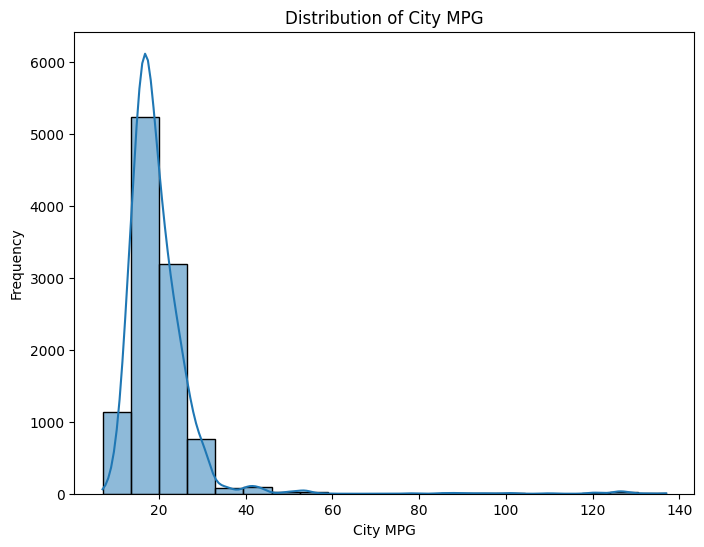

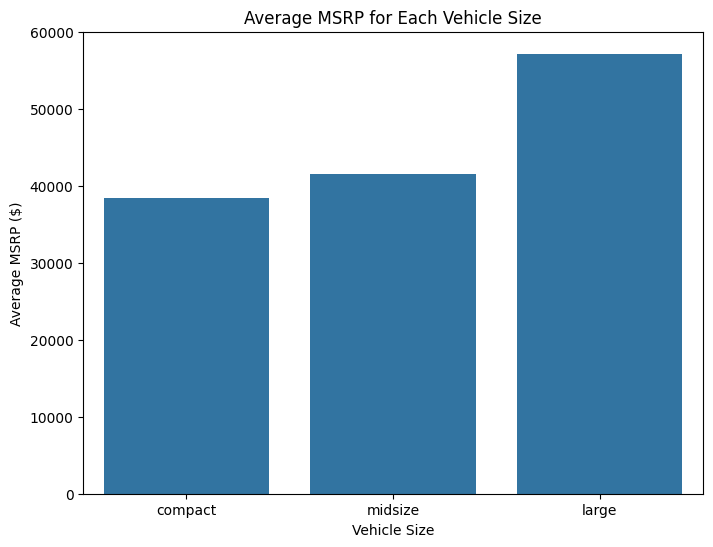

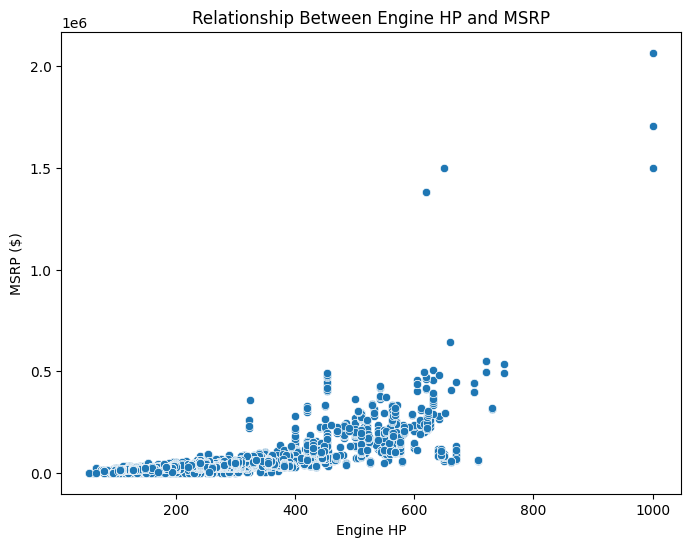

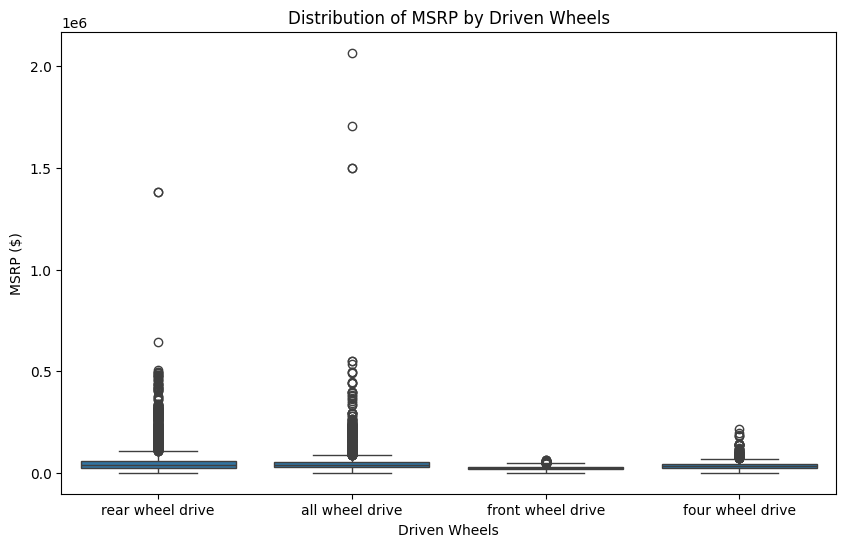

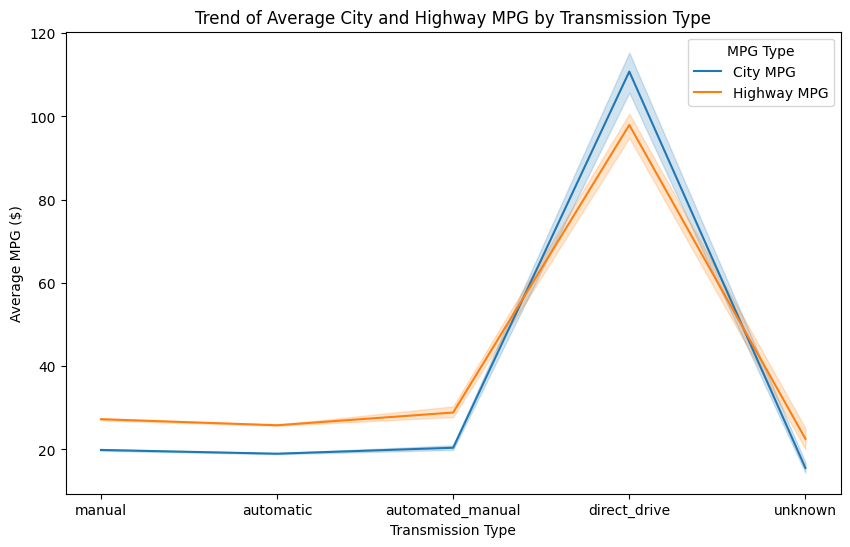

In [ ]:
# Visualizations with titles

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for City MPG distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['City MPG'], bins=20, kde=True)
plt.title('Distribution of City MPG')
plt.xlabel('City MPG')
plt.ylabel('Frequency')
plt.show()

# Bar chart for average MSRP by Vehicle Size
plt.figure(figsize=(8, 6))
sns.barplot(x='Vehicle Size', y='MSRP', data=df_cleaned, estimator=np.mean, errorbar=None)
plt.title('Average MSRP for Each Vehicle Size')
plt.xlabel('Vehicle Size')
plt.ylabel('Average MSRP ($)')
plt.show()

# Scatter plot for showing relationship between Engine HP vs. MSRP
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Engine HP', y='MSRP', data=df_cleaned)
plt.title('Relationship Between Engine HP and MSRP')
plt.xlabel('Engine HP')
plt.ylabel('MSRP ($)')
plt.show()

# A boxplot showing the distribution of MSRP for each category in Driven Wheels.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Driven Wheels', y='MSRP', data=df_cleaned)
plt.title('Distribution of MSRP by Driven Wheels')
plt.xlabel('Driven Wheels')
plt.ylabel('MSRP ($)')
plt.show()

# A line plot showing trends in average City MPG and Highway MPG for different Transmission Type
plt.figure(figsize=(10, 6))
sns.lineplot(x='Transmission Type', y='MPG', hue='City_Highway', data=pd.melt(df_cleaned, id_vars='Transmission Type', value_vars=['City MPG', 'Highway MPG'], value_name='MPG', var_name='City_Highway'))
plt.title('Trend of Average City and Highway MPG by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Average MPG ($)')
plt.legend(title='MPG Type')
plt.show()


### **Summary of Visualizations**

**Histogram:**

The histogram with a superimposed density plot illustrates **the distribution of City MPG** (miles per gallon) for a dataset. Most vehicles fall within the 20-25 MPG range, indicating that this is a common fuel efficiency for city driving. The distribution is right-skewed, showing a long tail toward higher MPG values. This visualization helps understand urban fuel efficiency and can guide decisions on vehicle purchases based on MPG performance.

**Bar plot:**

The bar chart titled "**Average MSRP for Each Vehicle Size**" illustrates the average Manufacturer's Suggested Retail Price (MSRP) for three vehicle sizes: compact, midsize, and large. The y-axis represents the average MSRP in dollars, ranging from 0 to 60,000. It reveals that large vehicles have the highest average MSRP, followed by midsize vehicles, with compact vehicles having the lowest average MSRP. This visual helps understand how vehicle size affects the average cost of vehicles

**Scatter Plot:**

The scatter plot titled "**Relationship Between Engine HP and MSRP**" illustrates how engine horsepower (HP) correlates with the Manufacturer's Suggested Retail Price (MSRP) of vehicles. The x-axis represents Engine HP, while the y-axis represents MSRP in dollars. The plot shows a positive relationship, indicating that as the engine horsepower increases, the MSRP also tends to increase. Most data points cluster between 0 to 600 HP and 0 to $500,000, with a few outliers having higher horsepower and price. This visualization helps understand the pricing trends based on engine power in the automotive market

**Box Plot:**

The box plot illustrates the distribution of the Manufacturer's **Suggested Retail Price (MSRP) for vehicles based on their driven wheel types**: rear wheel drive, all wheel drive, front wheel drive, and four wheel drive. The y-axis represents the MSRP in dollars, ranging from 0 to 2,000,000 dollars. Each box plot shows the median, interquartile range (IQR), and any outliers. Notably, rear wheel drive and all wheel drive vehicles exhibit a wider range of prices and more outliers compared to front wheel drive and four wheel drive vehicles, suggesting greater price variability in those categories.

**Line Plot:**

The line graph titled "**Trend of Average City and Highway MPG by Transmission Type**" shows the average miles per gallon (MPG) for different transmission types. The x-axis lists the transmission types: manual, automatic, automated_manual, direct_drive, and unknown. Two lines are present: one for City MPG (blue) and one for Highway MPG (orange). Both City and Highway MPG are relatively stable for manual, automatic, and automated_manual transmissions. However, there's a significant spike in MPG for the direct_drive transmission type, reaching above 100 MPG, followed by a sharp drop for the unknown type. This graph highlights the significant differences in fuel efficiency across various transmission types, particularly the high efficiency of direct_drive transmissions.

###**3.4 Correlation Analysis**

             Engine HP      MSRP  Popularity  City MPG  Highway MPG
Engine HP     1.000000  0.649383    0.030052 -0.334303    -0.340706
MSRP          0.649383  1.000000   -0.057534 -0.172421    -0.180437
Popularity    0.030052 -0.057534    1.000000 -0.001834    -0.018845
City MPG     -0.334303 -0.172421   -0.001834  1.000000     0.885900
Highway MPG  -0.340706 -0.180437   -0.018845  0.885900     1.000000


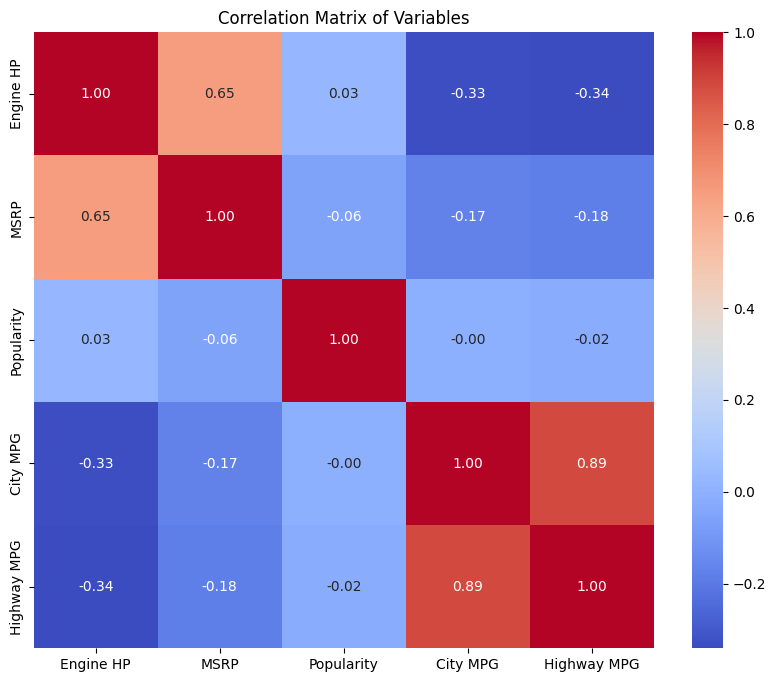

In [ ]:

# Engine HP, MSRP, Popularity, City MPG, and Highway MPG.

# Calculate the correlation matrix for the specified variables
correlation_matrix = df_cleaned[['Engine HP', 'MSRP', 'Popularity', 'City MPG', 'Highway MPG']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Use a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

### **Heat Map:**

The heatmap presents the **correlation matrix** for five variables: Engine HP, MSRP, Popularity, City MPG, and Highway MPG.

* **Engine HP** shows a strong positive correlation with MSRP and negative correlations with both City MPG and Highway MPG.

* **MSRP** has a weak negative correlation with City MPG and Highway MPG.

* **Popularity** displays very weak correlations with other variables.

* **City MPG** and **Highway MPG** exhibit a strong positive correlation with each other.

This visualization helps identify how different variables are related to one another, which can be valuable for understanding their interactions.

###**4 Summary of the Analysis**

From the analysis and visualizations, **several key insights and patterns** emerge.

The data reveals that vehicle size significantly impacts the Manufacturer's Suggested Retail Price (MSRP), with larger vehicles typically having higher MSRPs. There is a clear positive correlation between engine horsepower (HP) and MSRP, indicating that vehicles with higher engine power tend to be more expensive. Fuel efficiency patterns show that most vehicles fall within the 20-25 MPG range for city driving, and there's a notable increase in efficiency for direct_drive transmissions.

Additionally, the correlation matrix highlights that Engine HP negatively correlates with both City MPG and Highway MPG, suggesting that more powerful engines tend to be less fuel-efficient. Popularity appears to have minimal influence on other variables. These insights can guide consumers and manufacturers in understanding how different vehicle attributes affect pricing and performance.